# channappa_mini_project_03


## IMPORT LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## read the data

In [2]:
df=pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')

In [3]:
df1=df.copy()

In [4]:
df.shape

(200, 5)

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## data Exploration

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## EDA (Exploratory Data Analysis)

In [10]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:xlabel='Age'>

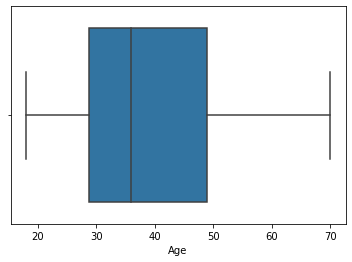

In [11]:
sb.boxplot(data=df,x='Age')

## univariate analysis 

In [12]:
v1=df.Gender.value_counts()
s1=v1.index


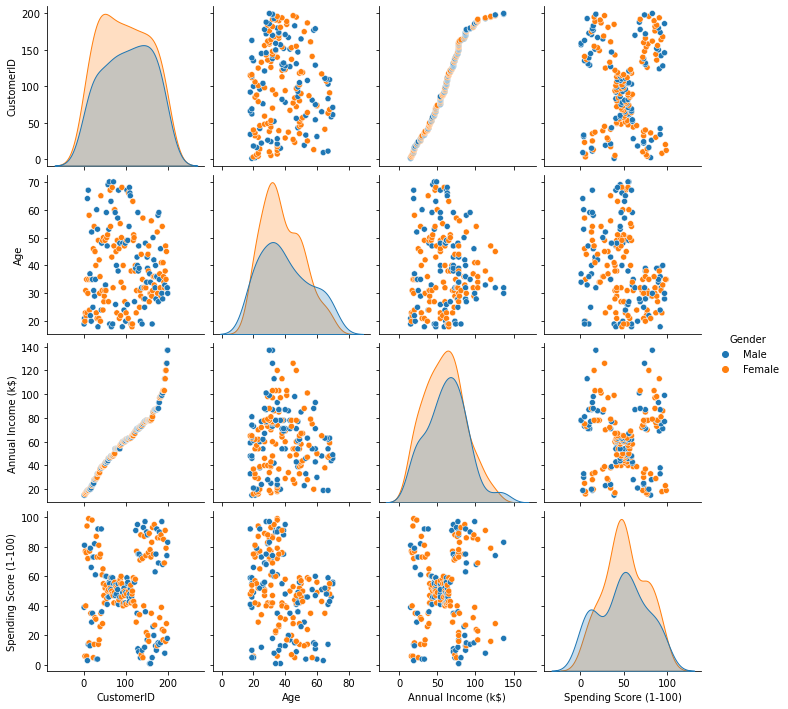

In [13]:
sb.pairplot(df,hue='Gender')

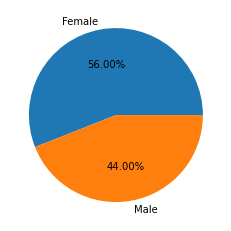

In [14]:
plt.pie(v1,labels=s1,autopct='%.2f%%')
plt.show()

In [15]:
bins=[18,20,30,40,50,60,70]

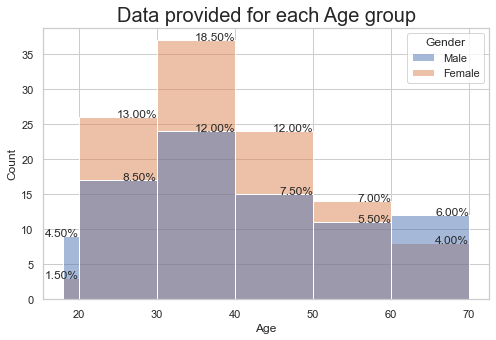

In [16]:
sb.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sb.histplot(x="Age",bins=bins,  hue='Gender',data=df)
plt.title('Data provided for each Age group', fontsize=20)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

In [17]:
bins=[20,40,60,80,100,120,140]

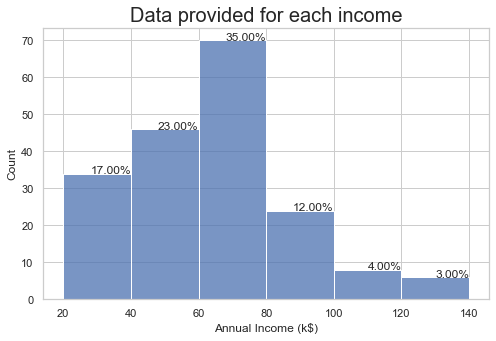

In [18]:
sb.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sb.histplot(x='Annual Income (k$)',bins=bins, data=df)
plt.title('Data provided for each income', fontsize=20)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

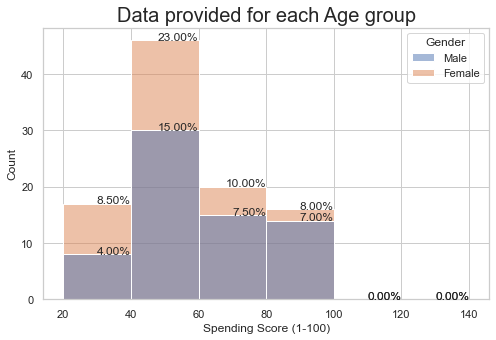

In [19]:
sb.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sb.histplot(x="Spending Score (1-100)",bins=bins,  hue='Gender',data=df)
plt.title('Data provided for each Age group', fontsize=20)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

## bivariate Analysis

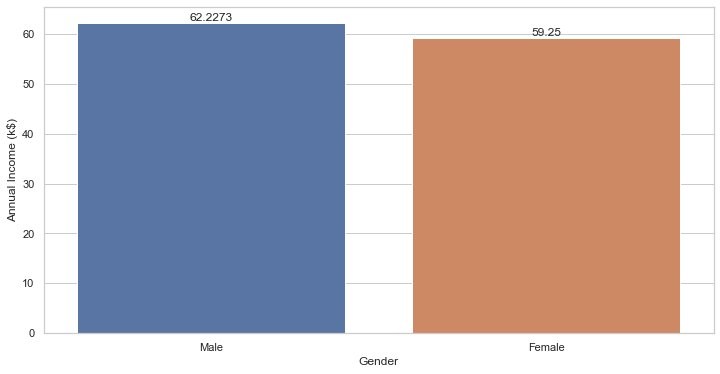

In [20]:
plt.figure(figsize=(12,6))
ax=sb.barplot(data=df,x='Gender',y='Annual Income (k$)',ci=None)
for container in ax.containers:
    ax.bar_label(container)

plt.show()

<AxesSubplot:xlabel='Gender', ylabel='Annual Income (k$)'>

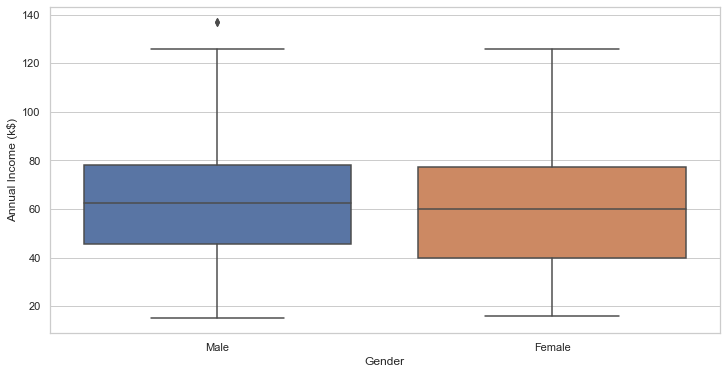

In [21]:
plt.figure(figsize=(12,6))
sb.boxplot(data=df,y='Annual Income (k$)',x='Gender')

## multivariate analysis

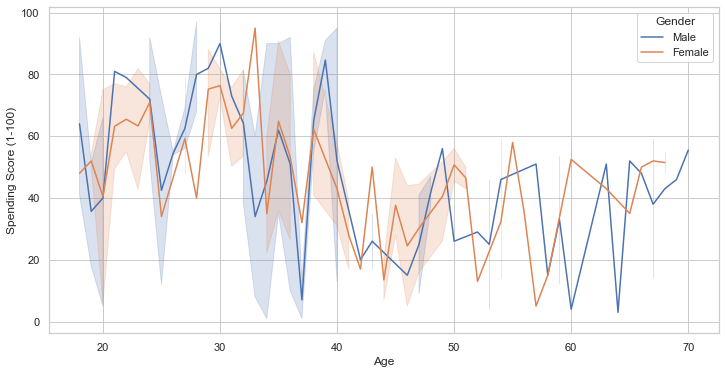

In [22]:
plt.figure(figsize=(12,6))
sb.lineplot(data=df,x='Age',y='Spending Score (1-100)',hue='Gender')
plt.show()

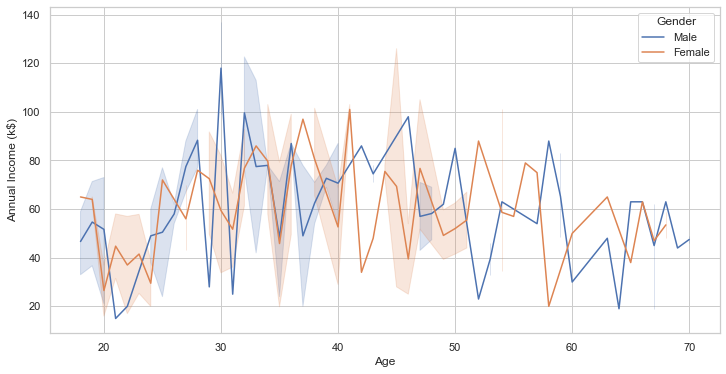

In [23]:
plt.figure(figsize=(12,6))
sb.lineplot(data=df,x='Age',y='Annual Income (k$)',hue='Gender')
plt.show()

## conclution
    1.the count of female customer is 56 %  more than male 44 % customer 
    2.the age gropu  of customer of increasing upto 40 then ofter its decreasing
    3. the count of customer is more un age group 30-40 in male it is about 12 % in female it is 18.5% 
    4. the customer with income upto 80k are more
    5. the customers having income more than 80k income count of customer  decreasing if income is increasing 
    6. in ,ale customer the salary randes from 48k to 78 k in female customer the salary ranges from 
    7. the spending score in female is increasing upto 35 age ofter 35 age its decresing 
    8.the spending score in females is increasing with age gropu 40 than ofter it is increase
    

## DATA PREPROCESSING

In [24]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## converting object to categorical


In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
df['Gender']=df['Gender'].astype('category')

In [27]:
encoder=LabelEncoder()

In [28]:
df['Gender']=encoder.fit_transform(df['Gender'])

In [29]:
df.dtypes

CustomerID                int64
Gender                    int32
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [30]:
## normalization
scaler=StandardScaler()

In [31]:
df1=df.copy()

In [32]:
df1=pd.DataFrame(scaler.fit_transform(df1),columns=df.columns)

In [33]:
#df1.drop(columns='CustomerID',axis=1,inplace=True)
df1.head(2)
df1.drop(columns=['CustomerID'],inplace=True)

In [34]:
cor=df1.corr()
cor

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


In [35]:
df1.iloc[:,2:]

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


<AxesSubplot:>

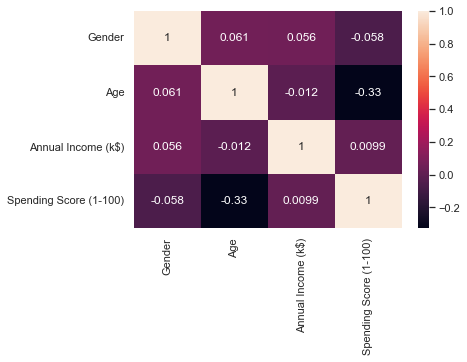

In [36]:
sb.heatmap(cor,annot=True)

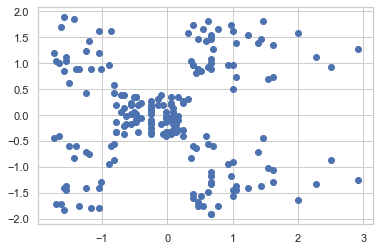

In [37]:
plt.scatter(data=df1,x='Annual Income (k$)',y='Spending Score (1-100)')

## Kmeans algorithm

In [38]:
from sklearn.cluster import KMeans

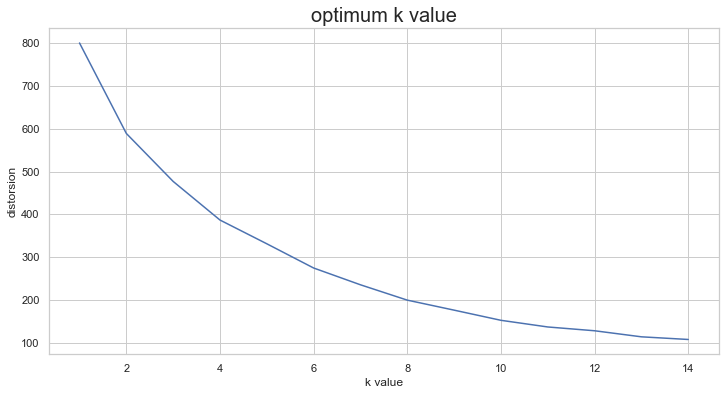

In [39]:
error=[]
for i in range(1,15):
    model=KMeans(n_clusters=i)
    model.fit(df1)
    error.append(model.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,15),error)
plt.xlabel('k value')
plt.ylabel('distorsion')
plt.title('optimum k value',fontsize=20)
plt.show()

### ofter k value 2 the curve getting parellel to x axis or constant we can select k value   from 2 to 6

For n_clusters = 2 The average silhouette_score is : 0.2518152915788437
For n_clusters = 3 The average silhouette_score is : 0.25951265087431563
For n_clusters = 4 The average silhouette_score is : 0.3012323168801352
For n_clusters = 5 The average silhouette_score is : 0.31437614343154285
For n_clusters = 6 The average silhouette_score is : 0.3199872749106995
For n_clusters = 7 The average silhouette_score is : 0.3581258657368066


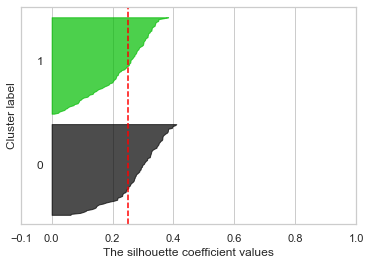

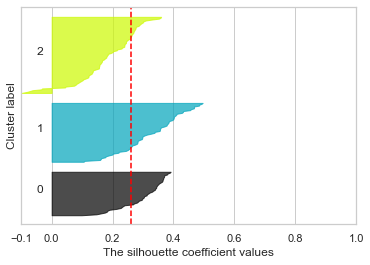

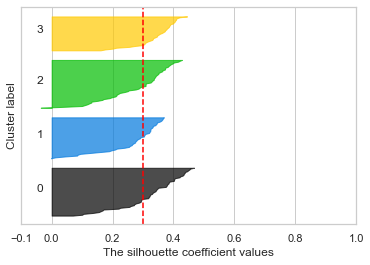

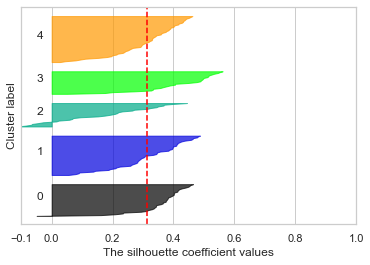

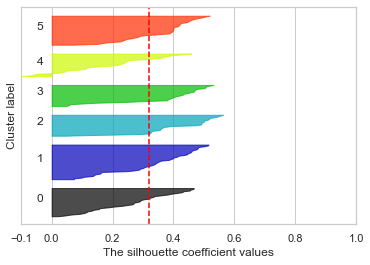

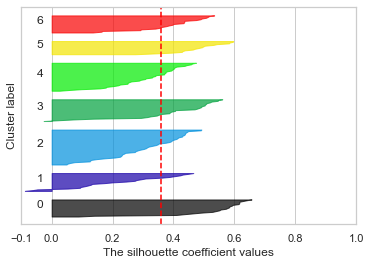

In [40]:
#finding the silhouette_samples and silhoutte_score
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2,3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df1) + (n_clusters + 1) * 10])
    
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df1)
    
    silhouette_avg = silhouette_score(df1, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df1, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        
        
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        
        y_lower = y_upper + 10 # 10 for the 0 samples
        
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

## for the k value 6 the sillhouette score is more or better so we select the k value as 7

# model building

In [41]:
model=KMeans(n_clusters=5)
model.fit(df1)

KMeans(n_clusters=5)

In [85]:
df1.iloc[:,2:]

,Annual Income (k$),Spending Score (1-100),dbscan_label1
0,-1.738999,-0.434801,-1
1,-1.738999,1.195704,0
2,-1.700830,-1.715913,1
3,-1.700830,1.040418,0
4,-1.662660,-0.395980,-1
...,...,...,...
195,2.268791,1.118061,-1
196,2.497807,-0.861839,-1
197,2.497807,0.923953,-1
198,2.917671,-1.250054,-1


In [43]:
labels=model.fit_predict(df1.iloc[:,2:])

In [44]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [45]:
df1

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704
2,-0.886405,-1.352802,-1.700830,-1.715913
3,-0.886405,-1.137502,-1.700830,1.040418
4,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,-0.886405,-0.276302,2.268791,1.118061
196,-0.886405,0.441365,2.497807,-0.861839
197,1.128152,-0.491602,2.497807,0.923953
198,1.128152,-0.491602,2.917671,-1.250054


In [46]:
from sklearn.metrics import silhouette_score

In [47]:
k_score=silhouette_score(df1,labels)
k_score=round(k_score,2)

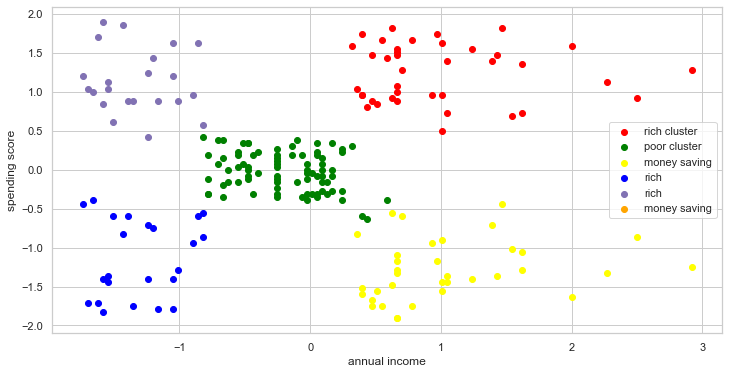

In [48]:
color=['red','green','yellow','blue','m','orange']
label=['rich cluster ','poor cluster ','money saving','rich','rich','money saving']
plt.figure(figsize=(12,6))
for i in range(0,6):
    plt.scatter(df1.iloc[labels==i,2],df1.iloc[labels==i,3],c=color[i],label=label[i])
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend(loc='best')
plt.show()

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

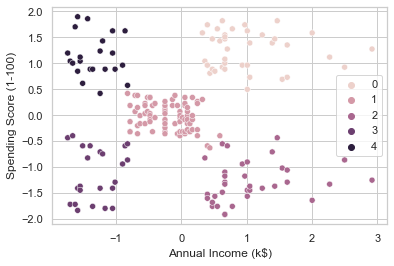

In [49]:
sb.scatterplot(x=df1.iloc[:,2],y=df1.iloc[:,3],hue=labels)

In [50]:
df['k_cluster']=labels

In [51]:
for cluster in df.k_cluster.unique():
    if cluster==0:
        print('low income and low spending score \n',df[df.k_cluster==cluster]['Spending Score (1-100)'].unique())
    elif  cluster==1:
        print()
        print('high income and low spending score \n',df[df.k_cluster==cluster]['Spending Score (1-100)'].unique())
    elif  cluster==2:
        print()
        print('low  income and high  spending score \n',df[df.k_cluster==cluster]['Spending Score (1-100)'].unique())
    elif  cluster==3:
        print()
        print('high  income and high  spending score \n',df[df.k_cluster==cluster]['Spending Score (1-100)'].unique())


high  income and high  spending score 
 [39  6 40  3 14 15 13 35 29  5 32 31  4 17 26 36 28]

high income and low spending score 
 [61 55 47 42 52 60 54 45 41 50 46 51 56 59 48 49 53 44 57 58 40 43 35 34]
low income and low spending score 
 [91 77 95 75 71 88 73 72 93 87 97 74 90 76 89 78 83 63 92 86 69 68 85 79]

low  income and high  spending score 
 [29 11  9  5  7 10 12 36 22 17 20 16  1 35 26 27 13 15 14 32 39 24 23  8
 28 18]


In [76]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),k_cluster
0,1,1,19,15,39,3
1,2,1,21,15,81,4
2,3,0,20,16,6,3
3,4,0,23,16,77,4
4,5,0,31,17,40,3
...,...,...,...,...,...,...
195,196,0,35,120,79,0
196,197,0,45,126,28,2
197,198,1,32,126,74,0
198,199,1,32,137,18,2


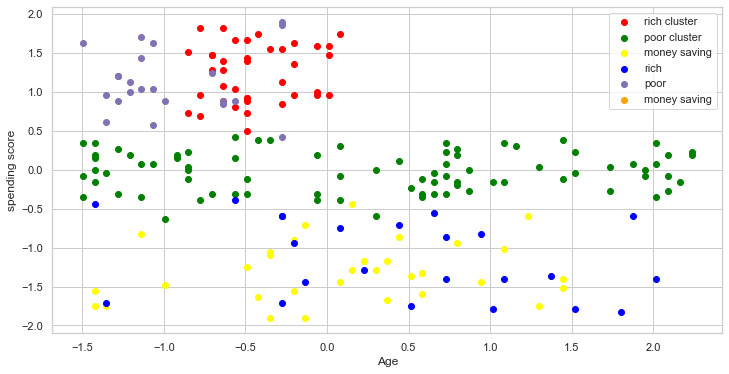

In [84]:
color=['red','green','yellow','blue','m','orange']
label=['rich cluster ','poor cluster ','money saving','rich','poor','money saving']
plt.figure(figsize=(12,6))
for i in range(0,6):
    plt.scatter(df1.iloc[labels==i,1],df1.iloc[labels==i,3],c=color[i],label=label[i])
plt.xlabel('Age')
plt.ylabel('spending score')
plt.legend(loc='best')
plt.show()

In [53]:
## conclution


In [54]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy  as sch

## agglomeratuve clustering

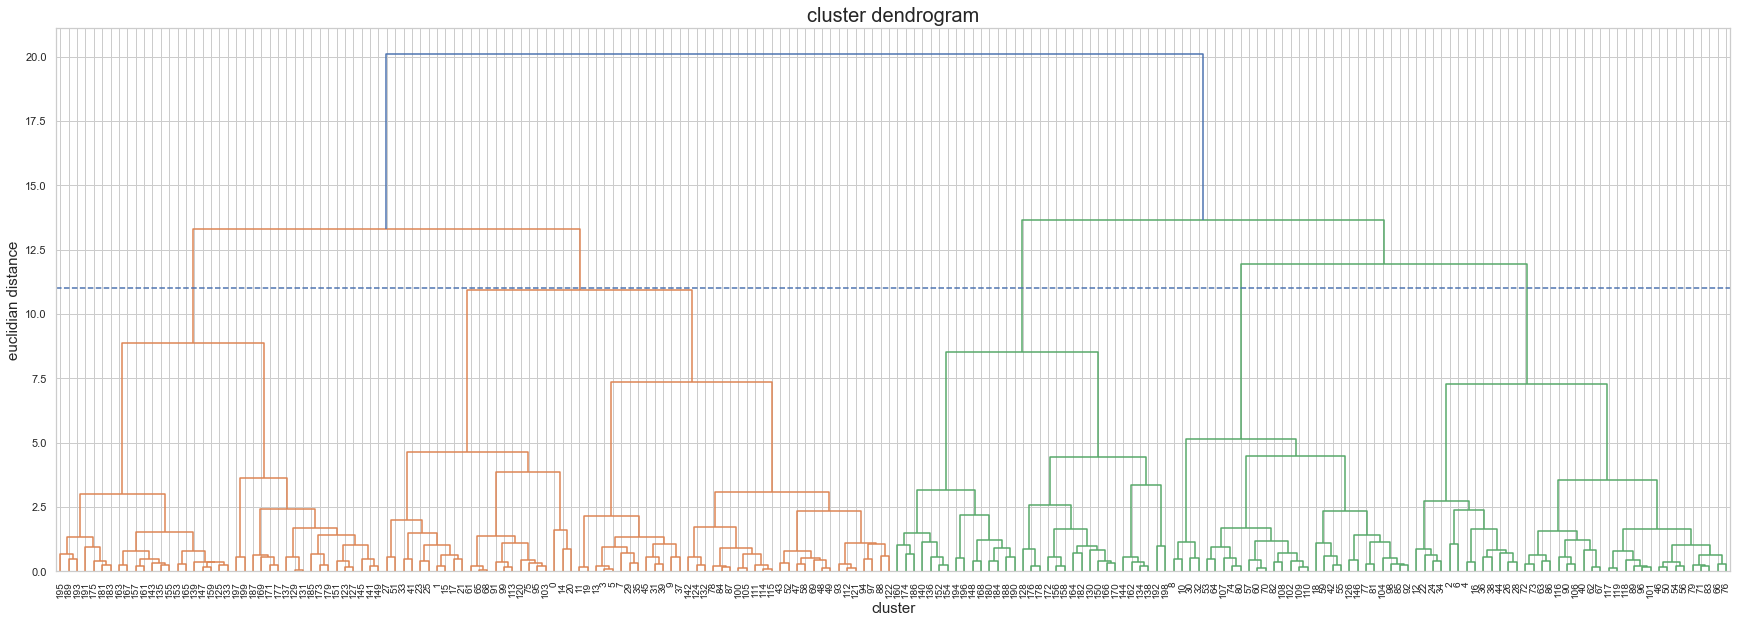

In [55]:
## plotting dendrogram
plt.figure(figsize=(30,10))
dendo=sch.dendrogram(sch.linkage(df1,method='ward'))
ax=plt.gca()
plt.axhline(y=11,linestyle='--')
ax.tick_params(axis='x', which='major',labelsize=10)
plt.title('cluster dendrogram',fontsize=20)
plt.xlabel('cluster',fontsize=15)
plt.ylabel('euclidian distance',fontsize=15)
plt.show()

In [56]:
#model building
hc1 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc1 = hc1.fit_predict(df1.iloc[:,2:])
y_hc1

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [57]:
a_score=silhouette_score(df1,y_hc1)
a_score=round(a_score,2)

In [58]:
color

['red', 'green', 'yellow', 'blue', 'm', 'orange']

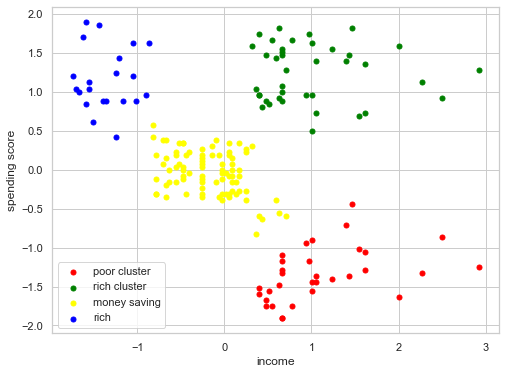

In [59]:
color=['red', 'green', 'yellow', 'blue', 'm', 'orange']
label=['poor cluster ','rich cluster ','money saving','rich','poor','money saving']
plt.figure(figsize=(8,6))

for i in range(0,4):
    plt.scatter(df1.iloc[y_hc1==i,2], df1.iloc[y_hc1==i,3],s=100, marker='.', c=color[i],label=label[i])
plt.xlabel('income')
plt.ylabel('spending score')
plt.legend(loc='best')
plt.show()

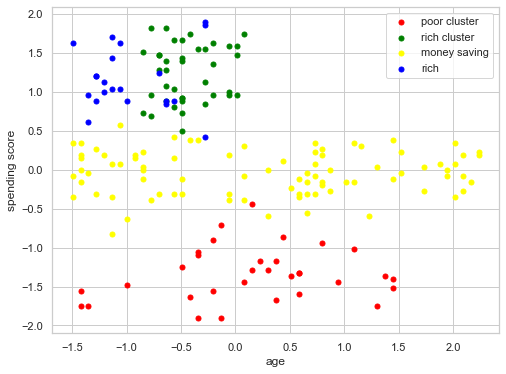

In [60]:
color=['red', 'green', 'yellow', 'blue', 'm', 'orange']
label=['poor cluster ','rich cluster ','money saving','rich','poor','money saving']

plt.figure(figsize=(8,6))
for i in range(0,4):
    plt.scatter(df1.iloc[y_hc1==i,1], df1.iloc[y_hc1==i,3],s=100, marker='.', c=color[i],label=label[i])
plt.xlabel('age')
plt.ylabel('spending score')
plt.legend(loc='best')
plt.show()

In [61]:
df1.head(2)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.424569,-1.738999,-0.434801
1,1.128152,-1.281035,-1.738999,1.195704


## Dbscan algorithm

In [62]:
from sklearn.cluster import DBSCAN

In [63]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df1)
distances, indices = nbrs.kneighbors(df1)

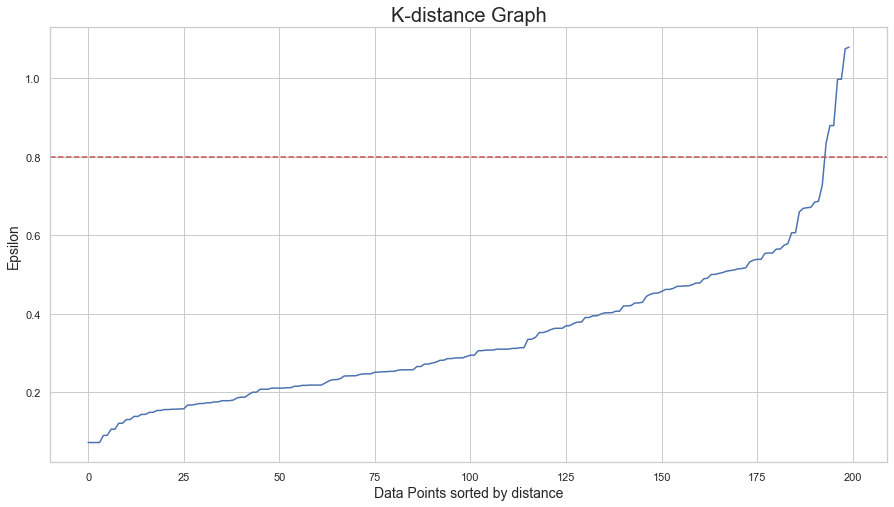

In [64]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=.8, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [65]:
# using hyper parameter calculating no of min_samples
eps=1
for min_samples in range(3,50):
    model=DBSCAN(eps=eps,min_samples=min_samples)
    cluster_labels = model.fit_predict(df1)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 1 | min_samples=  3 | obtained clustering:  [(1, 8), (2, 77), (3, 111), (4, 4)]
eps= 1 | min_samples=  4 | obtained clustering:  [(1, 8), (2, 77), (3, 111), (4, 4)]
eps= 1 | min_samples=  5 | obtained clustering:  [(1, 13), (2, 77), (3, 110)]
eps= 1 | min_samples=  6 | obtained clustering:  [(1, 13), (2, 77), (3, 110)]
eps= 1 | min_samples=  7 | obtained clustering:  [(1, 13), (2, 77), (3, 110)]
eps= 1 | min_samples=  8 | obtained clustering:  [(1, 16), (2, 74), (3, 110)]
eps= 1 | min_samples=  9 | obtained clustering:  [(1, 19), (2, 108), (3, 9), (4, 64)]
eps= 1 | min_samples=  10 | obtained clustering:  [(1, 32), (2, 105), (3, 63)]
eps= 1 | min_samples=  11 | obtained clustering:  [(1, 39), (2, 100), (3, 61)]
eps= 1 | min_samples=  12 | obtained clustering:  [(1, 48), (2, 100), (3, 25), (4, 27)]
eps= 1 | min_samples=  13 | obtained clustering:  [(1, 54), (2, 94), (3, 25), (4, 27)]
eps= 1 | min_samples=  14 | obtained clustering:  [(1, 60), (2, 91), (3, 24), (4, 25)]
eps= 1 | min

In [66]:
model=DBSCAN(eps=0.5,min_samples=10)
model.fit(df1.iloc[:,2:])

DBSCAN(min_samples=10)

In [67]:
df1['dbscan_label1']=model.labels_
df1['dbscan_label1'].value_counts()

 0    109
 2     32
 3     26
-1     21
 1     12
Name: dbscan_label1, dtype: int64

In [68]:
import matplotlib
from sklearn import metrics

In [69]:
d_score=silhouette_score(df1,df1.dbscan_label1)
d_score=round(d_score,2)

In [70]:
df1.head(1)

,Gender,Age,Annual Income (k$),Spending Score (1-100),dbscan_label1
0,1.128152,-1.424569,-1.738999,-0.434801,-1


Silhouette Coefficient: 0.290


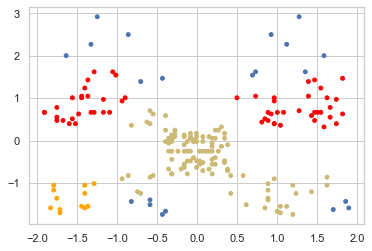

In [71]:
color=['b','y','orange','red']
plt.scatter(df1['Spending Score (1-100)'], df1['Annual Income (k$)'], c=df1['dbscan_label1'],cmap=matplotlib.colors.ListedColormap(color),s=15)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(df1, df1['dbscan_label1']))

## the cluster cormation is not good

In [72]:
score=[k_score,a_score,d_score]

In [73]:
score

[0.23, 0.23, 0.29]

In [74]:
from tabulate import tabulate

In [75]:
print(tabulate({'models':['KMeans','agglomeretive','Dbscan'],"sillhouttescore":score},headers=['model','sillhouttescore']))

model            sillhouttescore
-------------  -----------------
KMeans                      0.23
agglomeretive               0.23
Dbscan                      0.29
